In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gt_df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_5/Mid_bootcamp_project/Data/Raw/globalterrorismr.csv', encoding = 'ISO-8859-1')

/var/folders/h1/sm0yz6nx7m9cgsn8627qx6c00000gn/T/ipykernel_21058/2132931928.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  gt_df = pd.read_csv('/Users/jxhn/Desktop/IRONHACK/Week_5/Mid_bootcamp_project/Data/Raw/globalterrorismr.csv', encoding = 'ISO-8859-1')


In [3]:
attacktype_per_gang = gt_df.groupby('attacktype1_txt').size().reset_index(name='count').sort_values(by='count', ascending = False)
top10_attacktypes = attacktype_per_gang.head(10)

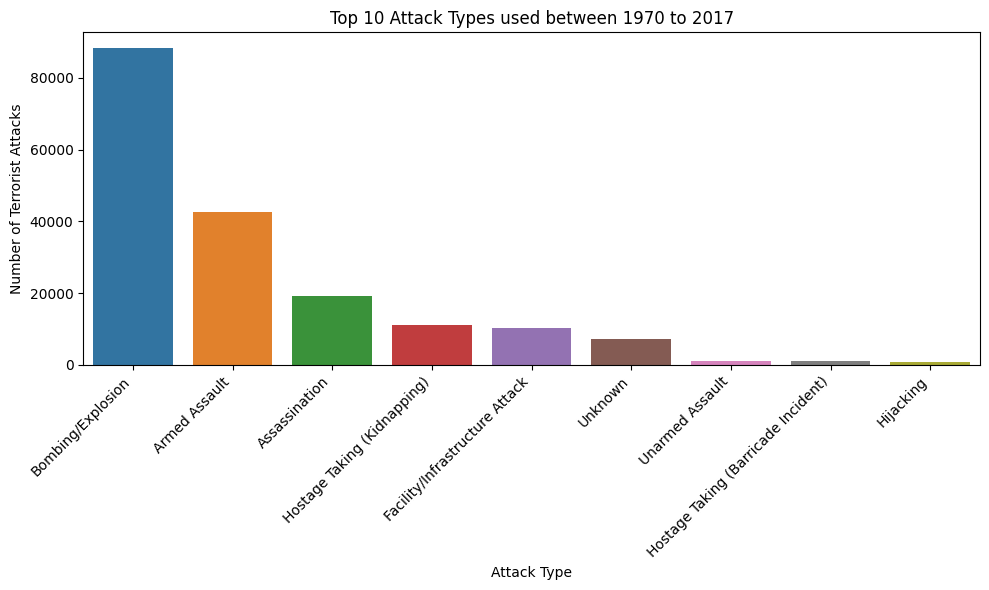

In [4]:
plt.figure(figsize=(10, 6))  # Adjusted the figure size as needed
ax = sns.barplot(x='attacktype1_txt', y='count', data=top10_attacktypes)
ax.set_title('Top 10 Attack Types used between 1970 to 2017')
ax.set_xlabel('Attack Type')
ax.set_ylabel('Number of Terrorist Attacks')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

plt.tight_layout()  # Adjust the layout of x-axis 
plt.show()

In [5]:
attacktype_per_gang2 = gt_df.groupby(['attacktype1_txt', 'success']).size().reset_index(name='count')
success_per_attacktype = attacktype_per_gang2[attacktype_per_gang2['success'] == 1]
top10_attacktypes2 = success_per_attacktype.groupby('attacktype1_txt')['count'].sum().nlargest(10).reset_index(name='success_count')

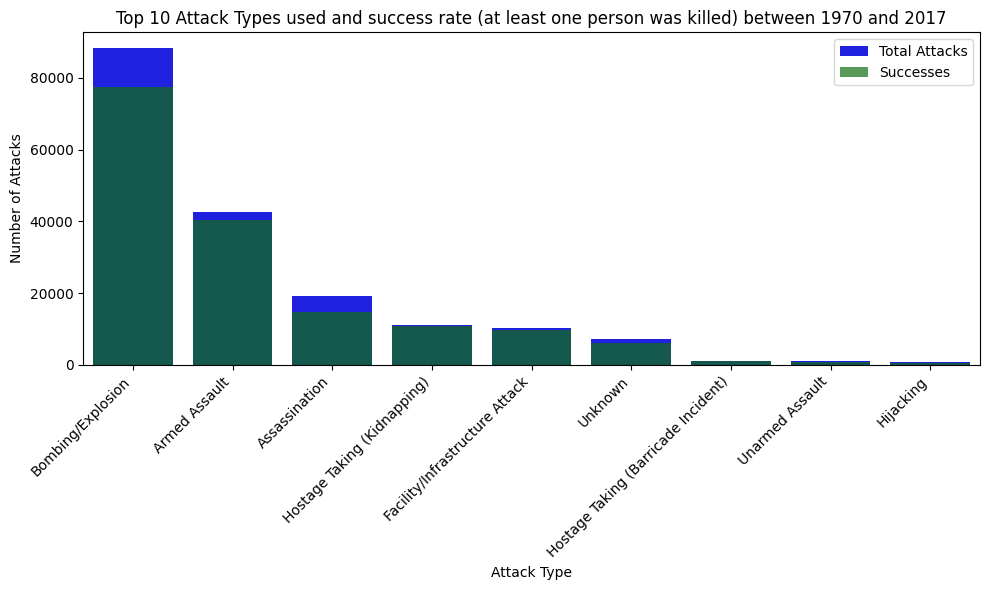

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='attacktype1_txt', y='count', data=top10_attacktypes, color='blue', label='Total Attacks')
sns.barplot(x='attacktype1_txt', y='success_count', data=top10_attacktypes2, color='green', alpha=0.7, label='Successes')

plt.title('Top 10 Attack Types used and success rate (at least one person was killed) between 1970 and 2017')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
kills_per_attack = gt_df.groupby('attacktype1_txt')[['nkill']].sum().reset_index()

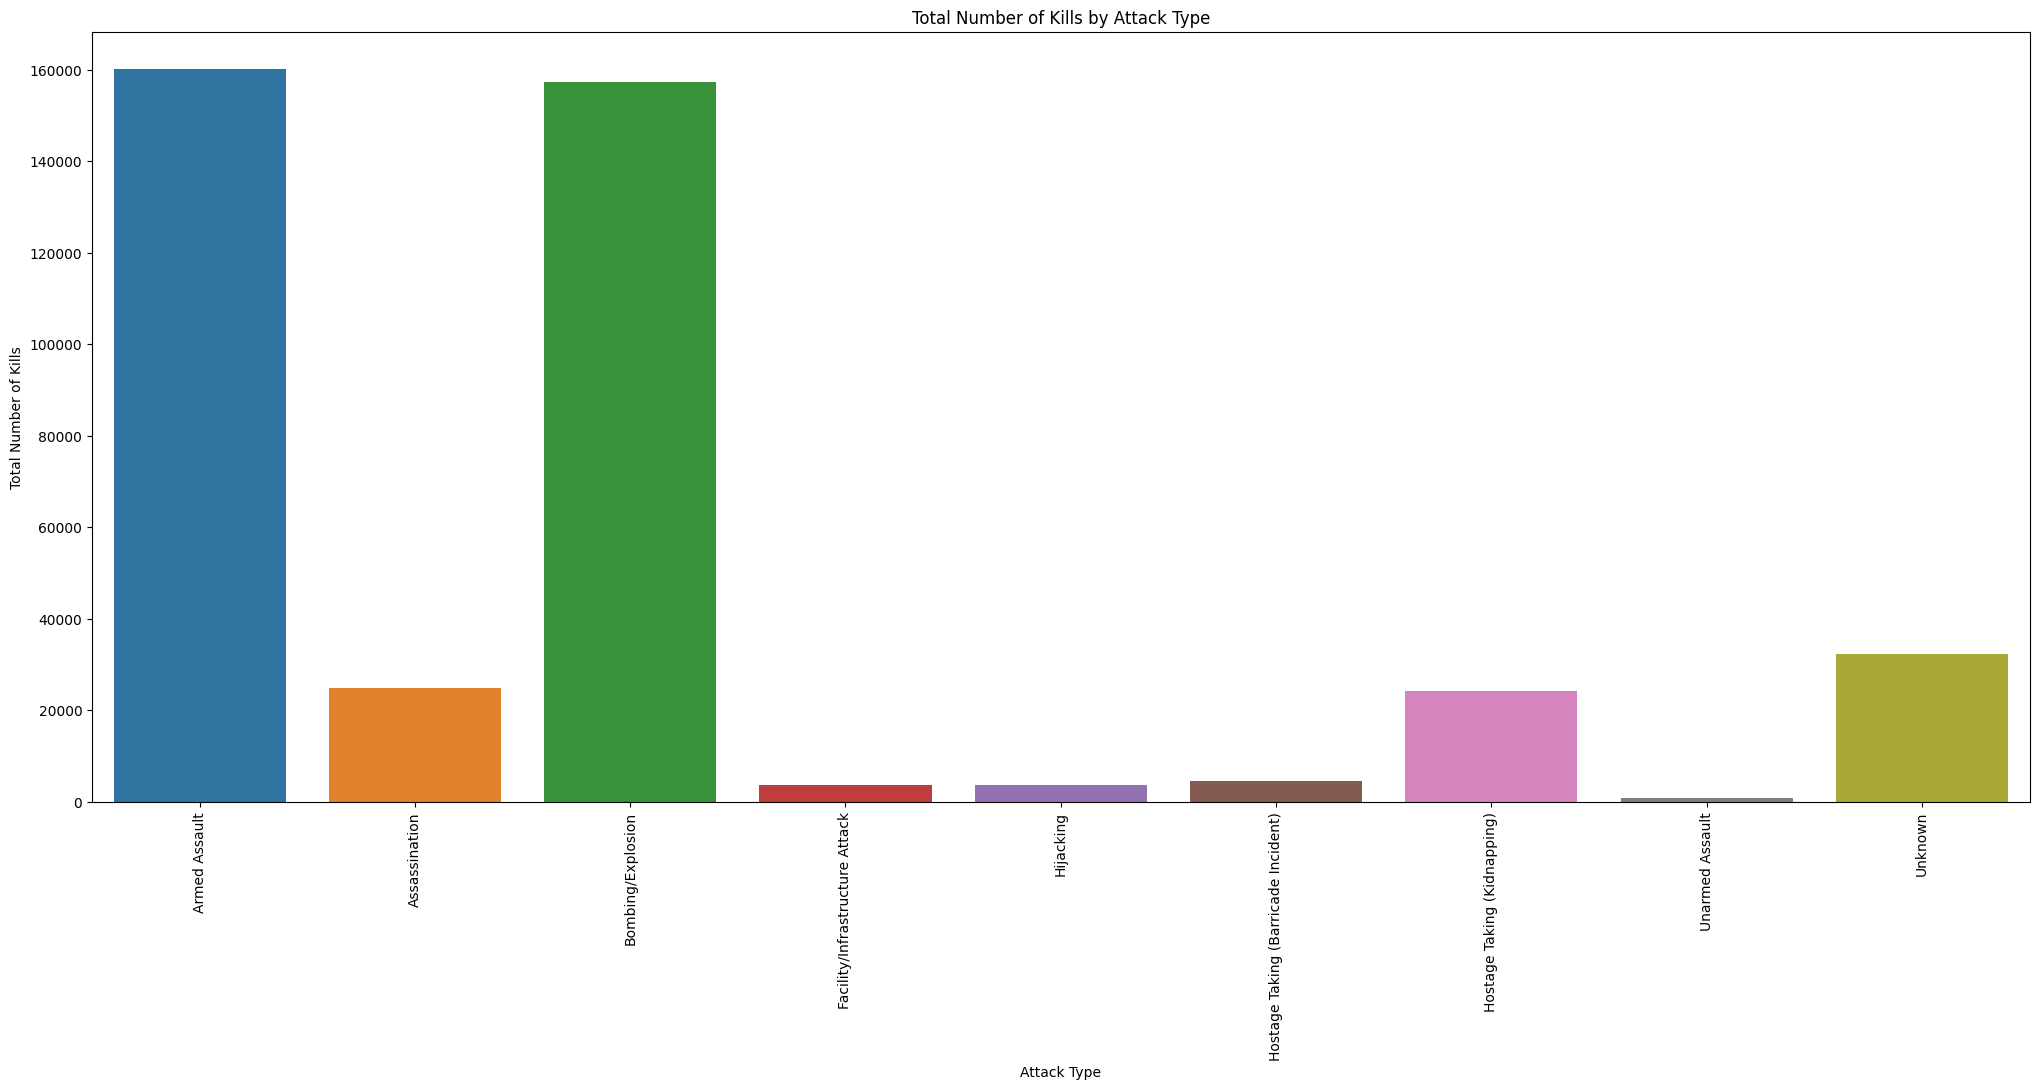

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=kills_per_attack)
plt.xlabel('Attack Type')
plt.ylabel('Total Number of Kills')
plt.title('Total Number of Kills by Attack Type')
plt.xticks(rotation=90)
plt.show()